In [4]:
from tinympc.tinympc_np import MPCSolver, LinearDynamics, LinearCost, LinearConstraints
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# test case: double integrator
# mpc parameters
dt = 0.1
N = 100
dyn = LinearDynamics(np.array([[1, dt], [0, 1]]), np.array([[0], [dt]]))
cost = LinearCost(np.eye(2), np.eye(1) * 0.05, np.eye(2))
constraints = LinearConstraints(-np.ones((2,1)) * 20, np.ones((2,1)) * 20, -np.ones((1,1)) * 1, np.ones((1,1)) * 1)

# solver
mpc = MPCSolver(dyn, cost, constraints, N, 0.001)



Kinf: 
 [[3.39821276 4.45630132]]
Pinf: 
 [[13.12677557  2.94566606]
 [ 2.94566606  3.56828028]]


[2.99906768 0.01848708]


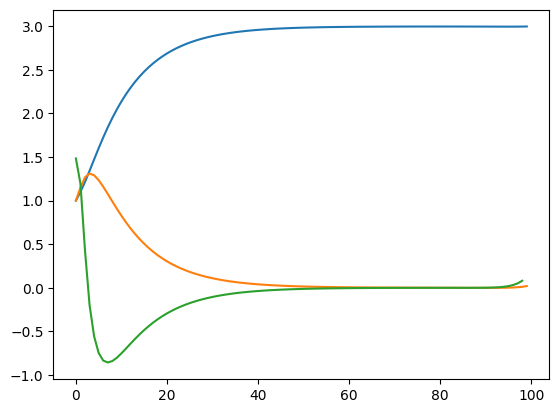

In [6]:

# reference trajectory and initial state
xref = np.zeros((2,N))+[[3],[0]]
x0 = np.array([1,1])
mpc.solve(xref,x0)


plt.plot(mpc.x[0,:])
plt.plot(mpc.x[1,:])
plt.plot(mpc.u[0,:])

print(mpc.x[:,-1])